#Recommender Systems

"You and I are essentially infinite choice-makers.  In every moment of 
our existence, we are in that field of possibilities where we have access to an infinity of choices"
- Deepak Chopra 

<img src='player1.jpeg'/>
<img src='amazon.png'/>

**Recommender systems** are a type of information filtering systems that seek to predict the rating that a user would give to an item. 

This process revolves around two main technologies: 

- ***Collaborative Filtering:*** Recommendations stem from users with similiar behavoir.  (Ex: Last.fm creates a 'station' of recommended songs by comparing user listening behavoir those with the listening behavoir of 'similiar' users.)
    

- ***Content-based Filtering:*** Examines the properties of the subject being recommended. (Ex: Pandora uses the properties of a song or artist in order to create a station )

## 1.1  Collaborative Filtering


### 1.11  Memory Based Methods:   


    * Neighbor-based Collaborative Filtering (CF) (Item-based / User-based algorithms )

It is called 'memory based', because we need to store all the ratings in order to make recommedations
#### 1.11 a)  User-User Collaborative Filtering  (Also known as K-NN collaborative filtering)

    * Provide recommendations based off a similiar user's ratings

First we start with the **Utility Matrix**

In [2]:
% pylab inline
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [3]:
df=pd.read_csv("users.csv",index_col='Unnamed: 0')

print '\n'
print  "OUR BAND-RATING UTILITY MATRIX"
print "\n"
df.head(10)



OUR BAND-RATING UTILITY MATRIX




,Angelica,Bill,Chan,Dan,Hailey,Jordyn,Sam,Veronica
Blues Traveler,3.5,2.0,5,3.0,NaN,NaN,5,3.0
Broken Bells,2.0,3.5,1,4.0,4,4.5,2,NaN
Deadmau5,NaN,4.0,1,4.5,1,4.0,NaN,NaN
Norah Jones,4.5,NaN,3,NaN,4,5.0,3,5.0
Phoenix,5.0,2.0,5,3.0,5,5.0,5,4.0
Slightly Stoopid,1.5,3.5,1,4.5,NaN,4.5,4,2.5
The Strokes,2.5,NaN,NaN,4.0,4,4.0,5,3.0
Vampire Weekend,2.0,3.0,NaN,2.0,1,4.0,NaN,NaN



-  Let's suppose we want to recommend a band to Sam. 
-  We will search to find a user similiar to Sam, and based on that person's favorites we can recommend a band or two
-  But how do we find someone 'similar'? 

#### We discover similiar users by using distance & similiarity metrics:

1)** Manhattan Distance:  **    

$distance = \sum{|x_1 - y_1|}$

    
    
2) **Euclidean Distance:   **

$distance = {\sqrt{\sum(x_1 - x_2)^2}}$

    

3)** Pearson Correlation:  **

$r=\begin{equation*}
(\left( \sum_{k=1}^n (x_i- \bar{x})(y_i- \bar{y}) \right)\above 1pt\sqrt{( \sum_{k=1}^n (x_i- \bar{x})^2})\sqrt{( \sum_{k=1}^n (y_i- \bar{y})^2}))
\end{equation*}$

    

4) **Cosine Similiarity: **     

cos(x,y)     = $x.y\above 1pt\ ||x||*||y||$ 

=   $(\left( \sum_{k=1}^n (x_i)(y_i) \right)\above 1pt\sqrt{( \sum_{k=1}^n (x_i})^2\sqrt{( \sum_{k=1}^n (y_i})^2)$

In [4]:
df.head(8)

,Angelica,Bill,Chan,Dan,Hailey,Jordyn,Sam,Veronica
Blues Traveler,3.5,2.0,5,3.0,NaN,NaN,5,3.0
Broken Bells,2.0,3.5,1,4.0,4,4.5,2,NaN
Deadmau5,NaN,4.0,1,4.5,1,4.0,NaN,NaN
Norah Jones,4.5,NaN,3,NaN,4,5.0,3,5.0
Phoenix,5.0,2.0,5,3.0,5,5.0,5,4.0
Slightly Stoopid,1.5,3.5,1,4.5,NaN,4.5,4,2.5
The Strokes,2.5,NaN,NaN,4.0,4,4.0,5,3.0
Vampire Weekend,2.0,3.0,NaN,2.0,1,4.0,NaN,NaN


In [5]:
from scipy.spatial.distance import cityblock

test=df[['Angelica','Bill']]
test=test.dropna()

#Calculating the distance between Angelica and Bill: 
dist=cityblock(test.Angelica,test.Bill)
print dist

9.0


**Pearson Correlation**

- As we can expect, average scores can differ greatly between different users
- Pearson correlation will address this for us!


$r=\begin{equation*}
(\left( \sum_{k=1}^n (x_i- \bar{x})(y_i- \bar{y}) \right)\above 1pt\sqrt{( \sum_{k=1}^n (x_i- \bar{x})^2})\sqrt{( \sum_{k=1}^n (y_i- \bar{y})^2}))
\end{equation*}$

In [6]:
# We can panda's 'corr' function to create a pearson square matrix 
pearson=df.corr('pearson')
        
pearson.head(8)

# Note: scipy.stats also has a 'pearson' function 

,Angelica,Bill,Chan,Dan,Hailey,Jordyn,Sam,Veronica
Angelica,1.000000,-0.904053,0.819782,-0.357941,0.617961,0.763975,0.281867,0.829386
Bill,-0.904053,1.000000,-0.975900,0.657376,-0.639064,-0.709299,-0.816497,-0.755929
Chan,0.819782,-0.975900,1.000000,-0.963087,0.703526,0.801784,0.766965,0.274774
Dan,-0.357941,0.657376,-0.963087,1.000000,0.133631,-0.041523,-0.485913,-0.750568
Hailey,0.617961,-0.639064,0.703526,0.133631,1.000000,0.728296,0.555556,0.000000
Jordyn,0.763975,-0.709299,0.801784,-0.041523,0.728296,1.000000,-0.183340,0.745815
Sam,0.281867,-0.816497,0.766965,-0.485913,0.555556,-0.183340,1.000000,-0.559017
Veronica,0.829386,-0.755929,0.274774,-0.750568,0.000000,0.745815,-0.559017,1.000000


#### Calculating Pearson for Angelica and Bill:


$r=\begin{equation*}
(\left( \sum_{k=1}^n (x_i- \bar{x})(y_i- \bar{y}) \right)\above 1pt\sqrt{( \sum_{k=1}^n (x_i- \bar{x})^2})\sqrt{( \sum_{k=1}^n (y_i- \bar{y})^2}))
\end{equation*}$


<img src="pearson1.png", width=1000>

([<matplotlib.axis.YTick at 0x107b53f10>,
 <a list of 8 Text yticklabel objects>)

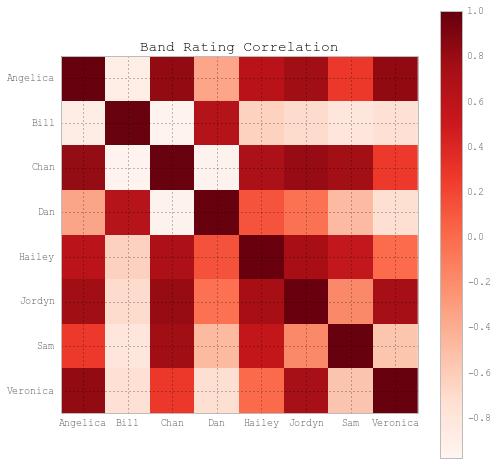

In [7]:
# Visualizing our Pearson Correlations.. 

pd.set_option('display.mpl_style', 'default')   
plt.rcParams['figure.figsize'] = (8, 8) 

cor=df.corr('pearson')

plt.imshow(cor,cmap='Reds',interpolation='none')
plt.colorbar()
plt.title("Band Rating Correlation ")
plt.xticks(range(len(cor)), cor.columns)
plt.yticks(range(len(cor)), cor.columns)

####And Lastly..

**Cosine Similiarity: **     

cos(x,y)     = $x.y\above 1pt\ ||x||$ 

=   $(\left( \sum_{k=1}^n (x_i)(y_i) \right)\above 1pt\sqrt{( \sum_{k=1}^n (x_i})^2\sqrt{( \sum_{k=1}^n (y_i})^2)$


- We can see that '0' (NaN) values will not affect our calculations

#### Calculating Pearson for Angelica and Bill:

<img src="cos_sim.png", width=800>

In [8]:
# in order to calculate, we use the fillna() function.. 

df_fill=df.fillna(0)
from scipy.spatial.distance import cosine

cos_sim=pd.DataFrame(index=df_fill.columns,columns=df_fill.columns)

for i in cos_sim.columns:
    for j in cos_sim.columns:
        cos_sim[i][j]=(1-cosine(df_fill[i],df_fill[j]))

cos_sim.head(8)

,Angelica,Bill,Chan,Dan,Hailey,Jordyn,Sam,Veronica
Angelica,1,0.5403925,0.8784262,0.648736,0.8456566,0.8025694,0.894823,0.9246279
Bill,0.5403925,1,0.5191967,0.8919611,0.4720599,0.7788001,0.5301921,0.3714131
Chan,0.8784262,0.5191967,1,0.5617676,0.6159179,0.5719461,0.8094702,0.8254166
Dan,0.648736,0.8919611,0.5617676,1,0.6354878,0.8325766,0.7666215,0.5635171
Hailey,0.8456566,0.4720599,0.6159179,0.6354878,1,0.8536183,0.7359801,0.7433314
Jordyn,0.8025694,0.7788001,0.5719461,0.8325766,0.8536183,1,0.7248993,0.7179389
Sam,0.894823,0.5301921,0.8094702,0.7666215,0.7359801,0.7248993,1,0.9104463
Veronica,0.9246279,0.3714131,0.8254166,0.5635171,0.7433314,0.7179389,0.9104463,1


#### Which Similiarity Metric Should we use ?

-  If there are large differences between user means --->  Use Pearson
-  If data is large and dense (mostly non-zero values) --->  Use Euclidean 
-  If data is sparse (many NaNs.. ) ---> Use Cosine Similiarity


####  K-NN 

Our recommender will provide results based on the closest matches.
However, imagine what could happen if these results were only based off of only one user.

What if you and I really liked the same music?  

But I also really like Barbara Streisand ..
If our recommender is only based off of one user, our system will send a recommendation of Streisand to you!

In order to avoid providing 'eccentric' recommendations: 
We can use KNN


<img src="babs1.png",width=200>

In [9]:
#  Fix -> try to change structure into dataframe.. ??
def computeNearestNeighbor(username, df):
    """creates a sorted list of users based on distance to username"""
    distances = []
    for i in df.columns:
        # make sure user is not self..
        if i != username:
            #pulling values from our pearson Matrix - 
            sim = pearson[i][username]
            distances.append((sim, i))
    # sort based on distance -- closest first
    distances.sort()
    # Just return the top 4 Neighbors
    return distances[-4:]

In [10]:
computeNearestNeighbor('Angelica',df)

[(0.6179606196162849, 'Hailey'),
 (0.76397486054754327, 'Jordyn'),
 (0.81978229472994113, 'Chan'),
 (0.82938597622637422, 'Veronica')]

In [13]:
## Refine for definition.. 

def recommendation(username,df):
    # first find nearest neighbor
    nearest = computeNearestNeighbor(username, df)[3][1]
    recommendations = []
    # now find bands neighbor rated that user didn't
    neighborRatings = df[nearest]
    userRatings = df['Angelica']
    for artist in neighborRatings.index:
        if np.isnan(userRatings[artist]):
            recommendations.append(artist)
    return recommendations  

recommendation('Angelica',df)

['Deadmau5']

####1.11 b)  Item-Item Collaborative Filtering  

    * With item-item CF methods: we first find the most similiar items, and then combine that information with the user's ratings fo items to generate a recommendation

   Filter     |  Cons  | 
--------|----------
User-Based| 1) Scalability (fine for thousands, can be an issue for millions -  Many more users than items ! )     2) Due to sparsity issues, we may have difficulty finding Nearest Neighbors
Item-Based | There won't be as much diversity within the item- based ( Users provide us with the element of surprise )

In [14]:
local='data.txt'
data=pd.read_csv(local,delimiter=',')

data.head()

,user,a perfect circle,abba,ac/dc,adam green,aerosmith,afi,air,alanis morissette,alexisonfire,...,timbaland,tom waits,tool,tori amos,travis,trivium,u2,underoath,volbeat,yann tiersen
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


** Explicit vs Implicit Utility Matrices **

Our previous matrix (for user-user) was an 'explicit' ratings matrix.  Explicit ratings reflect actual user ratings (ex: 4 stars).    
Note that the above matrix is an implicit ratings matrix, which is one that simply reflects behavoir (ie: did 'user 33' previously listen to adam green (or not)?)

In [15]:
#  We can drop the user column..  we won't need for now! 

items=data.drop('user',1)
# Lets create a placeholder dataframe listing item vs. item ~ a square matrix, 

items_sims=pd.DataFrame(index=items.columns,columns=items.columns)

In [16]:

# Looping through our columns:
# where cosine ~ cosine distance between item i and item j: 

for i in range(len(items.columns)):
    # looping through each column for each index
    for j in range(len(items.columns)):
        items_sims.ix[i,j]=1-cosine(items.ix[:,i],items.ix[:,j])


In [17]:
def find_sim_items(df1,df2):
    for i in range(len(df1.columns)):
        for j in range(len(df1.columns)):
            # getting cos similiarity by comparing on a row by row basis.. 
            df2.ix[i,j]=1-cosine(items.ix[:,i],items.ix[:,j])
    return df2

In [18]:
items_sims= find_sim_items(items,items_sims)

In [19]:
items_sims.head()

,a perfect circle,abba,ac/dc,adam green,aerosmith,afi,air,alanis morissette,alexisonfire,alicia keys,...,timbaland,tom waits,tool,tori amos,travis,trivium,u2,underoath,volbeat,yann tiersen
a perfect circle,1,0,0.01791723,0.05155393,0.06277648,0,0.05175492,0.06071767,0,0,...,0.04733811,0.08119979,0.3947089,0.125553,0.03035884,0.111154,0.0243975,0.06506,0.05216405,0
abba,0,1,0.05227877,0.02507061,0.06105625,0,0.0167789,0.02952693,0,0,...,0,0,0,0.06105625,0.02952693,0,0.0949158,0,0.02536731,0
ac/dc,0.01791723,0.05227877,1,0.1131537,0.177153,0.0678942,0.07572991,0.03807625,0,0.08833316,...,0.04452882,0.0678942,0.05824076,0.03936733,0,0.08713129,0.122398,0.02039967,0.130849,0
adam green,0.05155393,0.02507061,0.1131537,1,0.05663655,0,0.09338592,0,0,0.02541643,...,0,0.1465159,0.08378916,0.05663655,0.08216866,0.02507061,0.02201127,0,0.02353104,0.08804509
aerosmith,0.06277648,0.06105625,0.177153,0.05663655,1,0,0.1137147,0.1000556,0,0.06189845,...,0.0520051,0.02973505,0.02550722,0.06896552,0.03335187,0,0.2144225,0,0.05730683,0


In [20]:
data_neighbors=pd.DataFrame(index=items_sims.columns,columns=[range(1,11)])

In [21]:
for i in range(0,len(items_sims.columns)):
    data_neighbors.ix[i,:10]=items_sims.ix[0:,i].order(ascending=False)[:10].index
    

### 1.12  Model Based Methods:   

Types of Model Based Methods:

     *  Matrix Factorization 
     *  Association Rule Mining
     *  Probabilistic models (Clustering models, Bayesian networks) 
         
As oppposed to memory based methods, rating values do not necessarily need to be stored (Hence, they tend to scale 
better)

 #### 1.12 a) Matrix Factorization:
 
###### Single Value Decomposition (SVD):

 
Where user-based and item-based algorithms can be easily implemented and intuitive, Matrix Factorization methods can be more effective because they allow us to discover latent features underlying the interactions between users and items (think PCA !).

The Matrix Factorization Process:
- Allows us to factorize two or more matrices such that when you multiply them back together you will get (an approximation for) the original matrix.

$$ {P}\cdot{Q}^T = \hat{R} $$ 

1) Let's imagine we have the following Utility Matrix: 


In [22]:
R = [[5,3,0,1],
     [4,0,0,1],
     [1,1,0,5],
     [1,0,0,4],
     [0,1,5,4]]

2) Our task is predict the missing ratings (We can think of this as imputing methods used to fill NaN's)

3) Consider our Utility Matrix to be of size |U| X |D| ( Where: U ~ Users, D ~ Items )

4) For this example, we will be returning (2) matrices: P & Q. We can assume that the our matrix P will contain the 'strength' of the Users and matrix Q will contain the 'strength' of the Items.  

5)How do we obtain P & Q ? 

- Initialize two matrices with some values ( we will use Gaussian dist.)

- Calculate how different their product is from R - > Using Gradient Descent (SGD), we minimize these differences (~ error)  iteratively (Our goal is to find the local minimum of the difference).


$ (e_{ij})^2 = (r_{ij}-\hat{r_{ij}})^2 = (r_{ij}-\sum_{k=1}^K {p_{ij}}q_{kj})^2 $
 

6) In order to minimize our error, we have to know which direction in which to modify  our p_ik and q_kj values.  In other words, we have to find the gradient at our current values.  As we know from calculas class, in order to minimize we differentiate with respect to either variable.


<img src='SGD.png'/>

Alpha in the equation above is a 'step' constant which will determine the rate at which we will be approaching the minimum.  Ideally, we will work with small values (ex : 
alpha = 0.0002)

Using the above update rules iteratively, we update our P  & Q matrix values until the error converges to a minimum.
Once the errror converges to a min., we can stop the process.

7) Our Final Step : Regularization

A common extension this above 'basic' algorithm is to introduce regularization to avoid overfitting (B~ .02): 

<img src='beta.png'/>

In [28]:
# parameters : U, V and features: D 
# this will establish matrix factorization using Gradient Descent
# given matrix is minimized

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):

    Q = Q.T
    
    error =[]
    for step in xrange(steps):
        for i in xrange(len(R)):
            for j in xrange(len(R[i])):
                
                # if rated:
                if R[i][j] > 0:
                    
                    # calc. error 
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                        
                    # hence our gradient is d/dpik(eij^2) = -2(rij-Rhat)(qkj) =-2eij(qkj)
                    
                    # Here alpha is a constant whose value determines the rate of the approaching min.. 
                    
                    # our parameter B is used to control the magnitudes of the user-feature and item-features vectors.
                    # such that P and Q would give a good approximation of R
                    for k in xrange(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])

                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = numpy.dot(P,Q)

        e = 0

        for i in xrange(len(R)):

            for j in xrange(len(R[i])):

                if R[i][j] > 0:

                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    
                    
                    for k in xrange(K):

                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
                        
        error.append(e)              
        if e < 0.001:

            break

    return P, Q.T,error

In [24]:
R = [[5,3,0,1],
     [4,0,0,1],
     [1,1,0,5],
     [1,0,0,4],
     [0,1,5,4]]

In [29]:
R=np.array(R)

N= len(R)
M=len(R[0])

# We can assign 
K=2

# find p,q:   init U and M with randomized value between 0.0 and 1.0 with standard Gaussian distribution
P=np.random.rand(N,K)
Q=np.random.rand(M,K)
            
nP,nQ,error= matrix_factorization(R,P,Q,K)
nR=np.dot(nP,nQ.T)

In [26]:
print "P Matrix"
print nP
print nP.shape
print '\n'

print "Q Matrix"
print nQ
print nQ.shape

print '\n'
print "R_hat Matrix"
print nR
nR.shape

P Matrix
[[ 0.17991487  2.37972344]
 [ 0.23357136  1.8230413 ]
 [ 1.9955658   0.35401974]
 [ 1.59663498  0.29886978]
 [ 1.51001018  1.30045047]]
(5, 2)


Q Matrix
[[ 0.18989661  2.12030532]
 [ 0.10072875  1.11689813]
 [ 1.28364242  2.22009469]
 [ 2.45031597  0.23644865]]
(4, 2)


R_hat Matrix
[[ 5.07990549  2.67603126  5.51415772  1.00353067]
 [ 3.90975858  2.05967877  4.34714641  1.00337928]
 [ 1.1295811   0.59641483  3.34755024  4.97347425]
 [ 0.93689075  0.49463415  2.71302759  3.98292755]
 [ 3.04409786  1.60457213  4.82543629  4.00749181]]


(5, 4)

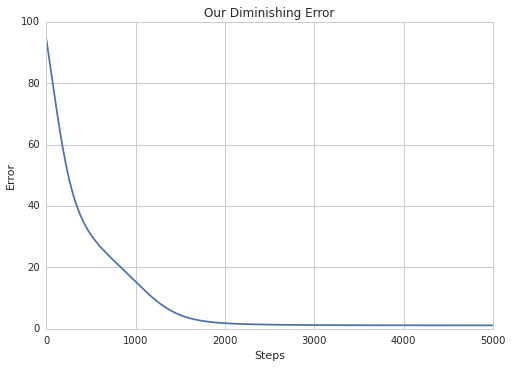

In [30]:
import seaborn as sns
sns.set_style('whitegrid')

plt.plot(error)
plt.title ("Our Diminishing Error")

plt.ylabel('Error')
plt.xlabel('Steps')


**Further Reading and References: **

        
- Netflix Prize:  http://blog.echen.me/2011/10/24/winning-the-netflix-prize-a-summary/
        
- See Crab module: Recommender Framework in Python
    http://muricoca.github.io/crab/
        
- 'Mining Massive Datasets', Jure Leskovec (Stanford Univ)
